## Paper - Deep Recurrent Q-Learning for Partially Observable MDPs

### Main focus

Extends the DQN paper by replacing the fully-conencted layer to a recurrent LSTM resulting into deep recurrent q-network

In the real world, it's rare that the full state of the system can be provided , therefore the markov property rarely holds. A POMDP better captures the dynamics of many real-world environments , by acknwoledging that the sensations recieved by the agent are only partial glimpses of the underlying system. The work is about handling such scenarios with RNN's.

Goal: to demonstrate that recurrent deep Q-network can better approximate actual q-values from sequences of observations, leading to better policies in partially observed environments.

### Problems identified
- DQN is trianed using an input consisting of the last four states the agent has encountered.Thus unable to master games that require the player to remember events more distant than four screens in the past. (appear Non-markovian) and instead of a MDP it becomes a POMDP. levergaing RNN's can help in dealing iwth POMDPs
- The algorithm greatly handles the loss of information happening in DQN

### Architecture Details

- $84 \times 84$ Preprocessed image $\rightarrow$ 3 CNN's $\rightarrow$ Fully-connected LSTM layer $\rightarrow$ linear layer to output a Q-value corresponding to each action.
- Paramters of both the CNN and Recurrent (LSTM's) are learned fom scratch simultaneously.

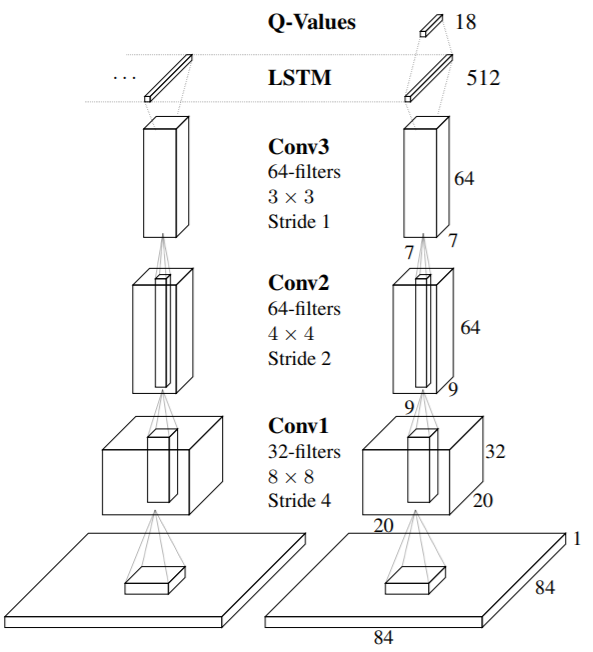

In [1]:
from IPython.display import Image
Image(filename='POMDP.png')

### Performing recurrent Updates 

1. Bootstrapped Sequential Updates - randomly select episodes form replay memory and updates begin at the *beginning* of each episode and proceed till conclusion.RNN's hidden state is carried forward througout the episode.
2. Bootstrapped Random updates - randomly select episodes form replay memory and updates begin at the *random points* in each episode and proceed only for *unroll intertion timesteps*.RNN's initial state is zeroed at the start of the update.

Sequential could ebe preffered choice but the sampling of experinces sequentially violates DQNs random sampling policy. So random upates better adhere to policy which is itself randomized. Both performed equally good though.

### Flickering Pong Concept

In order to use the "state" of the atari games rather than observations in DQN(only last 4 frames) --- amodification was done where in the game of pong at each timestep the screen is either fully revealed or fully obscured with probablity of 0.5. Obscuirng frames in this way ,induces an incomplete memory of observations needed for Pong to become a POMDP.

Despite seeing a single frame at a time, individual LSTM units also detect high level events, respectively: the agent missing the ball, ball reflections off of paddles, and ball reflections off the walls. Each image superimposes the last 10-frames seen by the agent, giving more luminance to the more recent frames.and DRQN performs good at this task even when given one input frame per timestep.

### Results

Though the results here excellent for Pong but it seems to be an outlier. The paper concludes that though recurrency is a viable method for handling state observations , it confers no systematic benefit compared to stacking the observations in the input layer of a convolutional network